In [2]:
import sys
import numpy as np
import os

sys.path.append('..')

from hydroml.model import BaryonModel
from hydroml.plot import plot_output, plot_output_compare

from torch.utils.data import DataLoader

from torch import nn

import torch

In [3]:
batch_size = 1
ngpu = 0
# Epochs set to '1' for testing
epochs = 100000
learning_rate = 1e-4
beta1 = 0.001
n_samples = 20000

In [4]:
from hydroml.dataset import Dataset

net_Baryons_19 = np.fromfile('../datasets/training/NetbaryonDis_OSG3DAuAu19.6_tune18.2_wBulk_22momdeltaf_netBaryon.dat', dtype=np.float32)

net_Protons_19 = np.fromfile('../datasets/training/NetbaryonDis_OSG3DAuAu19.6_tune18.2_wBulk_22momdeltaf_netProton.dat', dtype=np.float32)

dataset = Dataset(net_Baryons_19, net_Protons_19, 141)

#dataset = dataset

data_loader = DataLoader(
    dataset=dataset,
    batch_size=1,
    shuffle=True,
)

print(len(data_loader))

5000


In [5]:
model = BaryonModel()

In [6]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
#optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)

In [7]:
loss_func = nn.MSELoss()

300


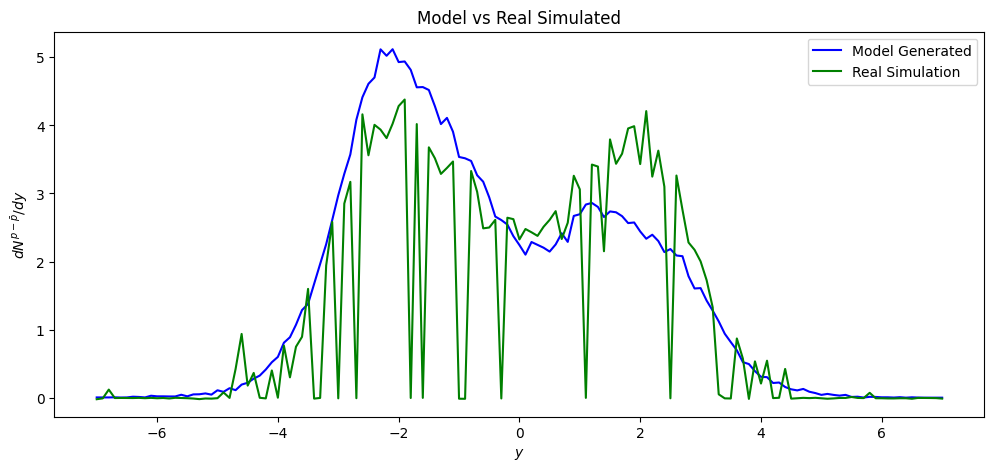

500


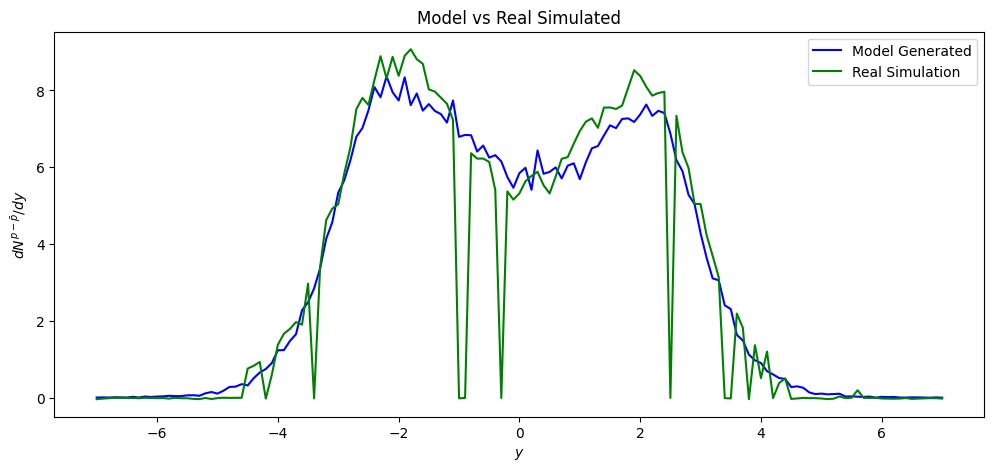

800


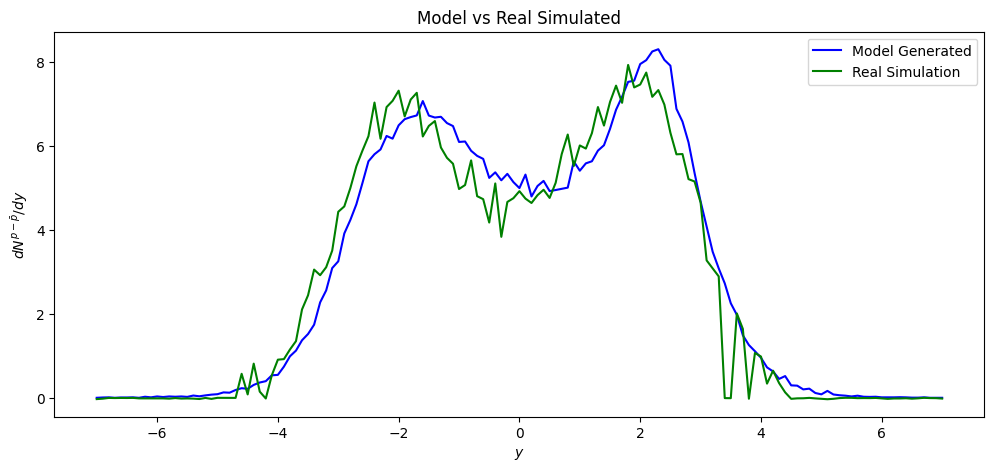

900


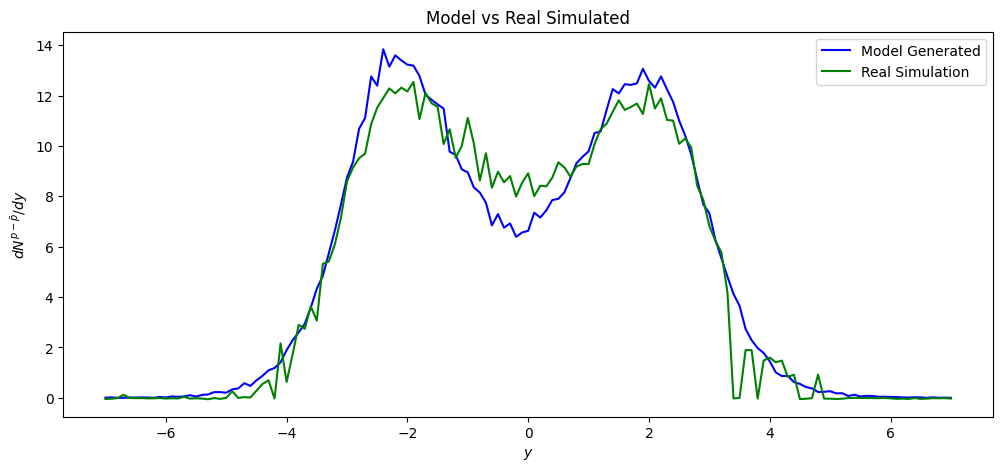

1000


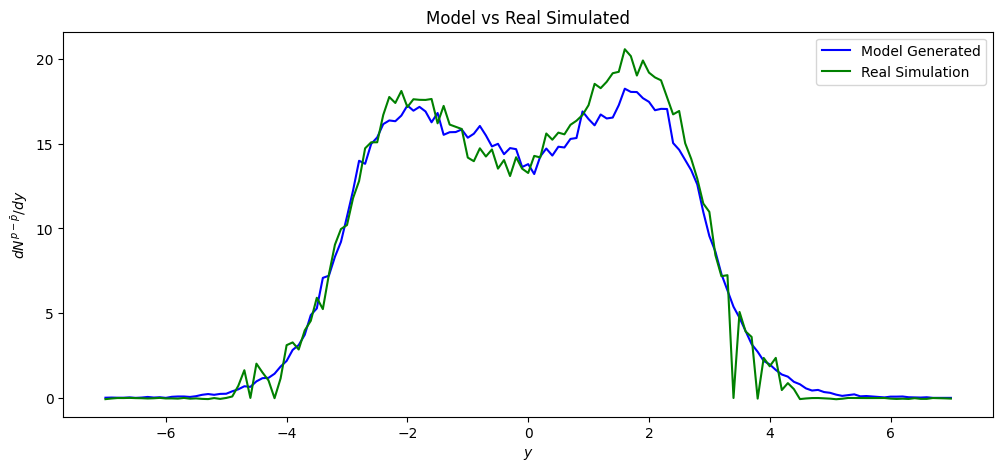

1300


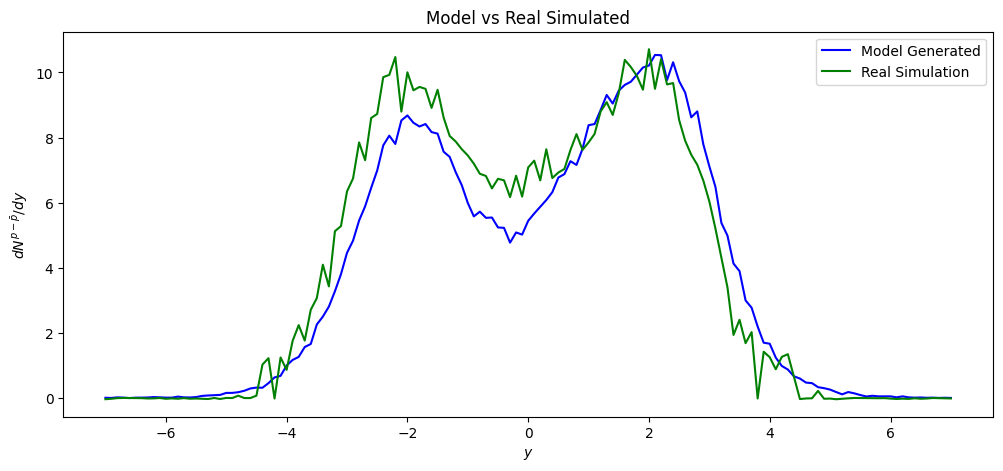

1400


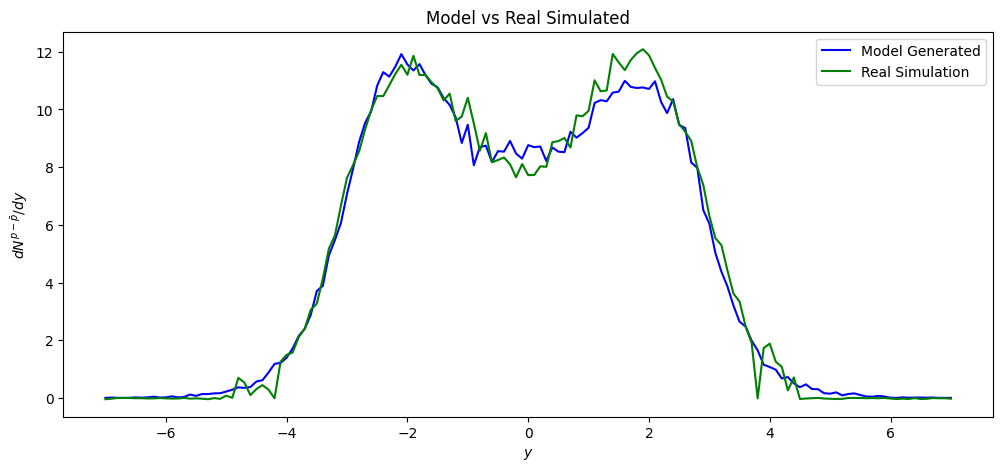

1600


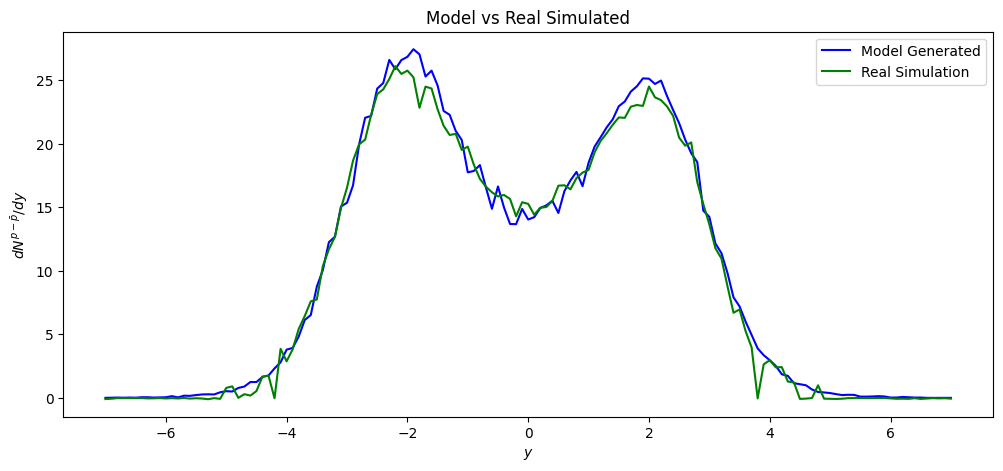

1700


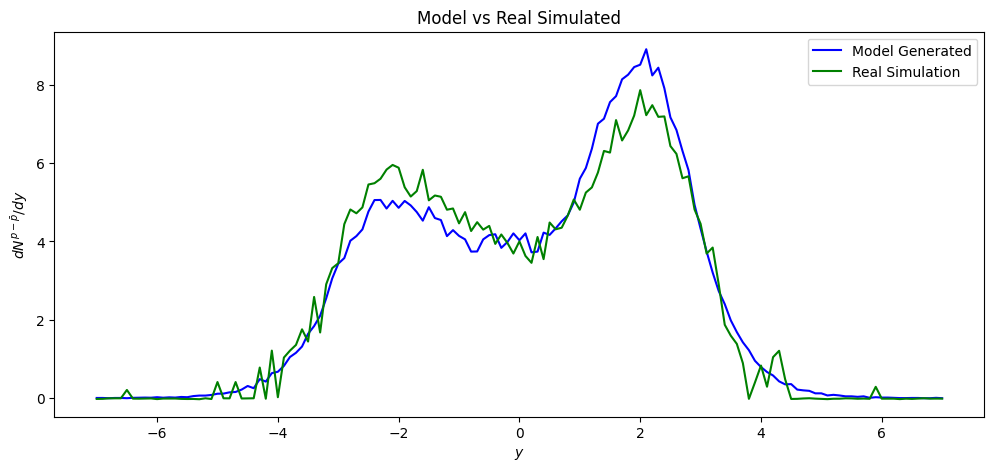

1800


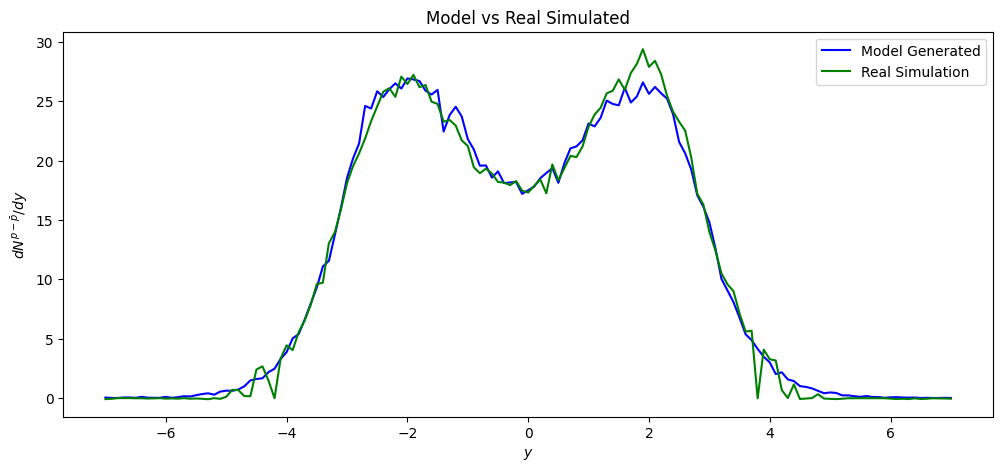

2400


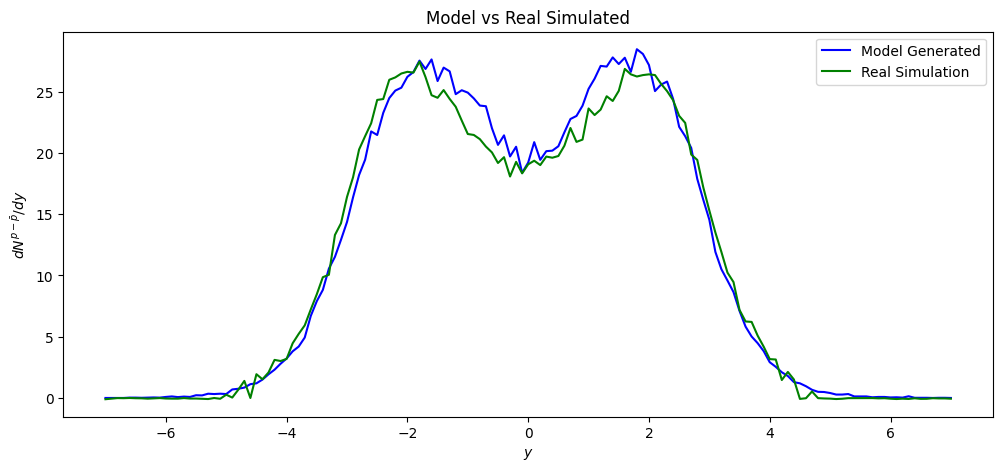

2600


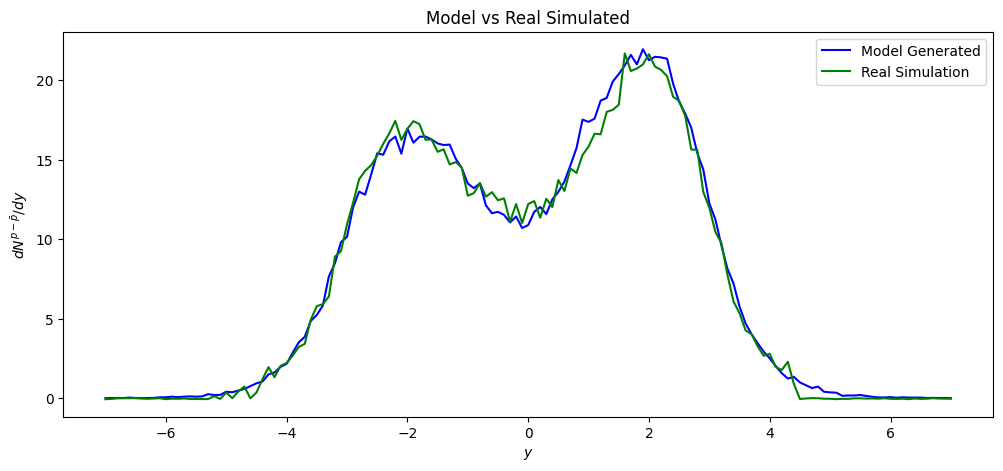

2700


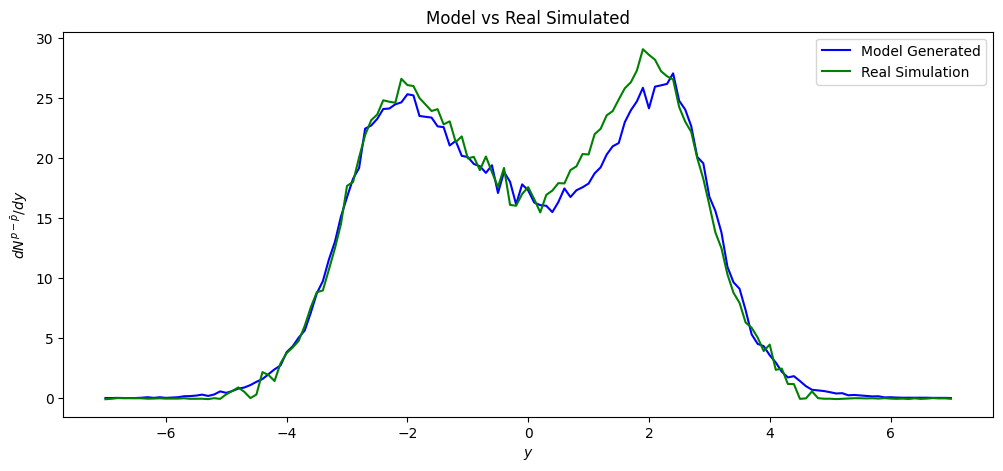

2800


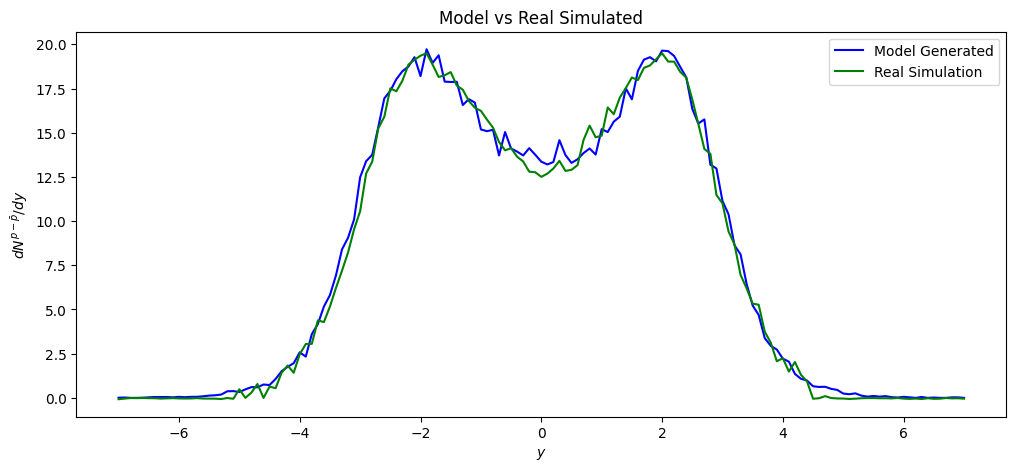

3100


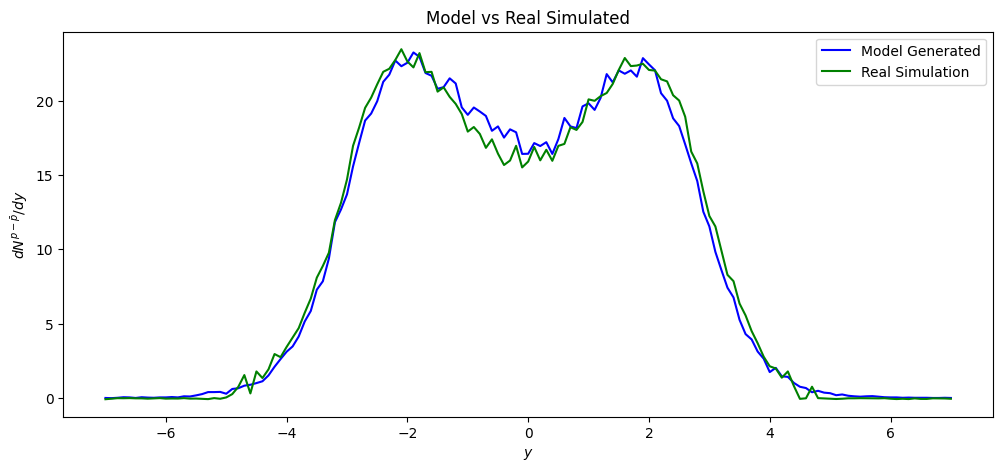

3200


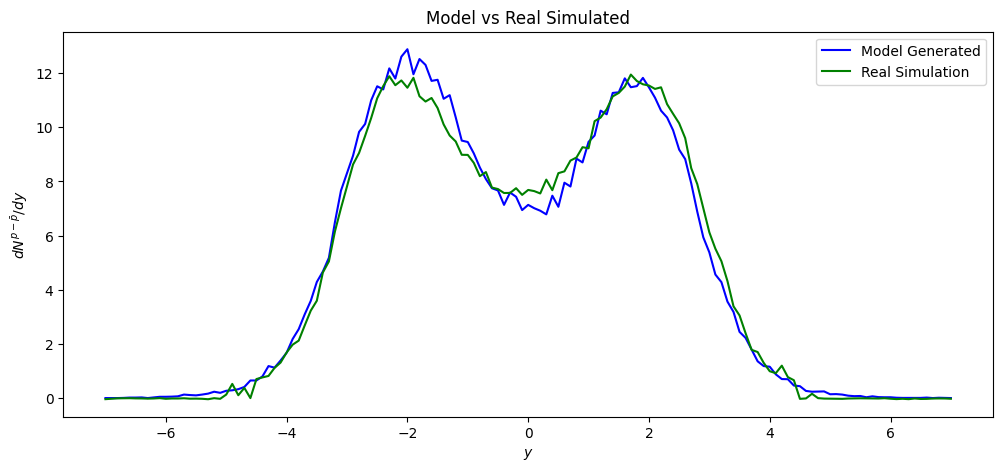

3400


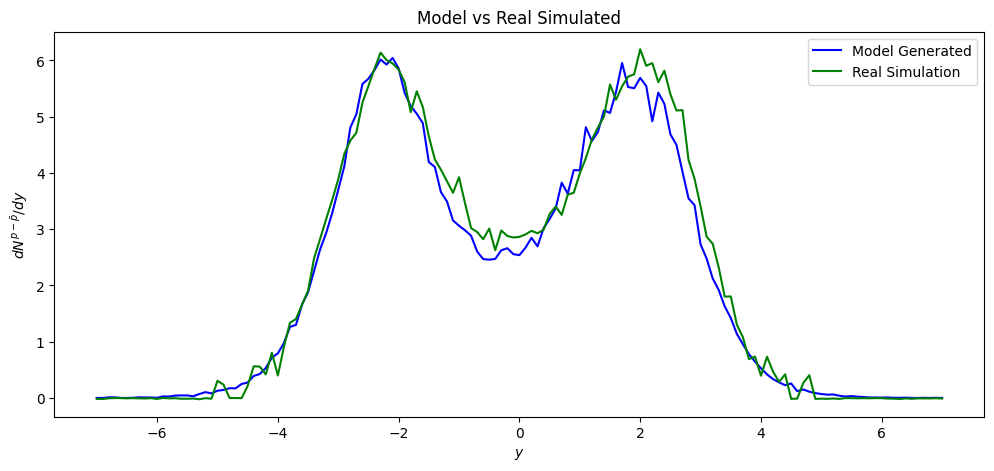

3500


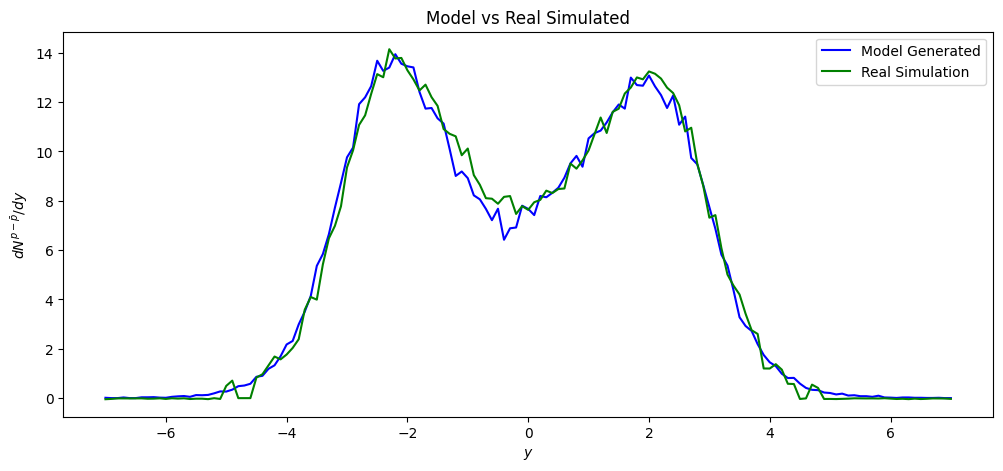

3600


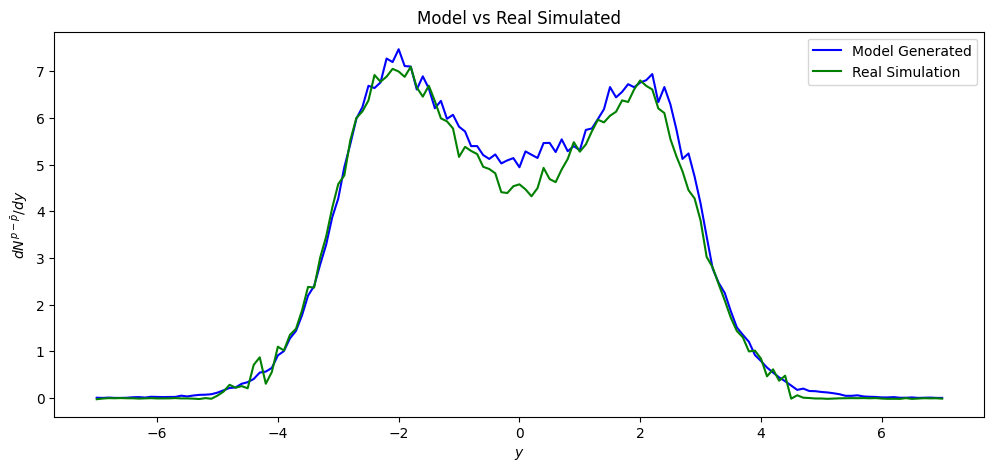

3700


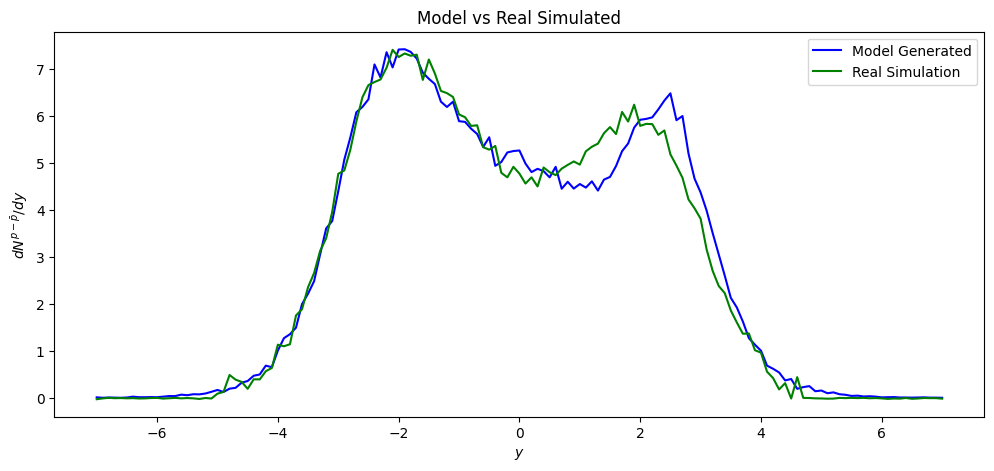

3800


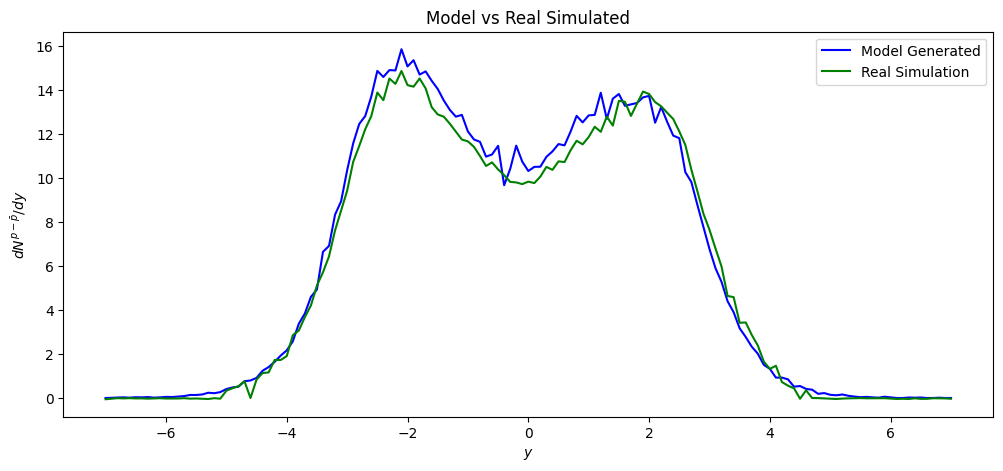

4100


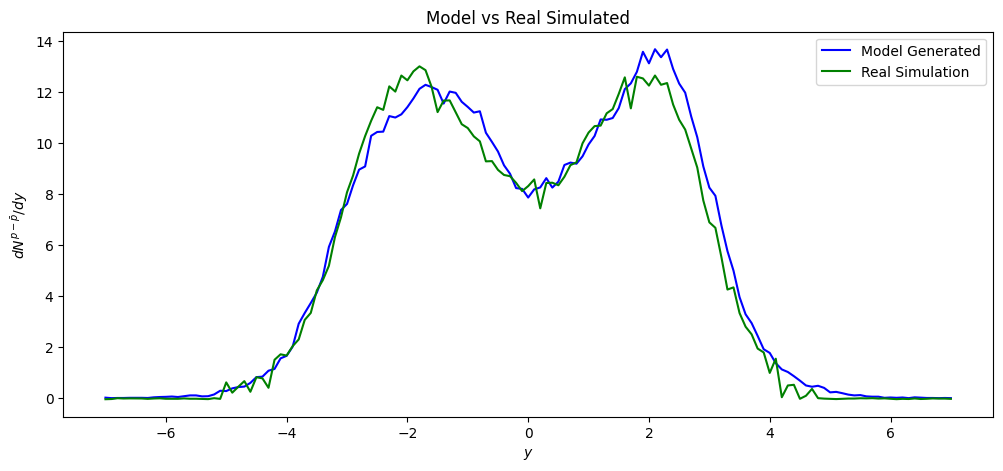

4300


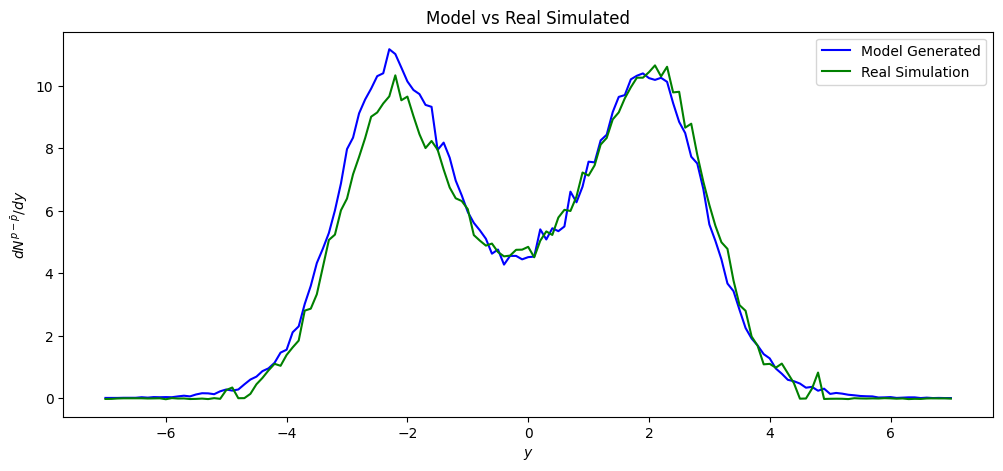

4400


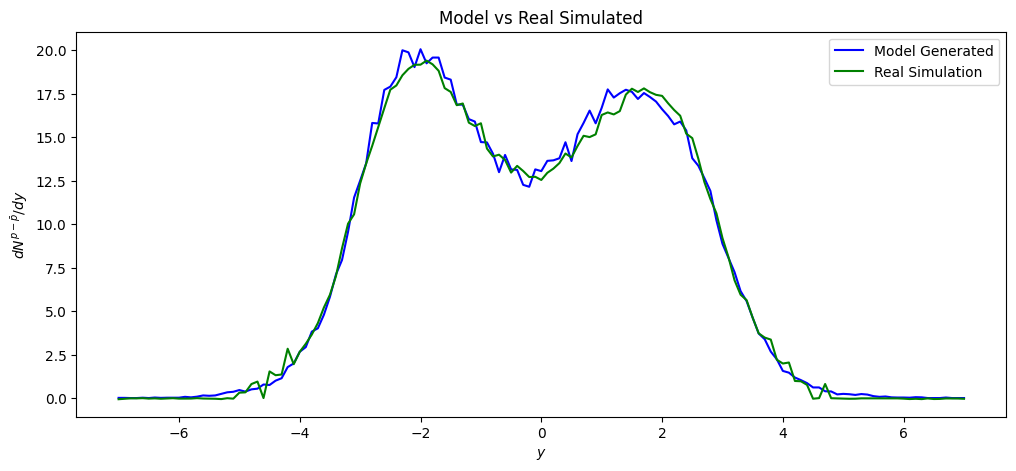

4600


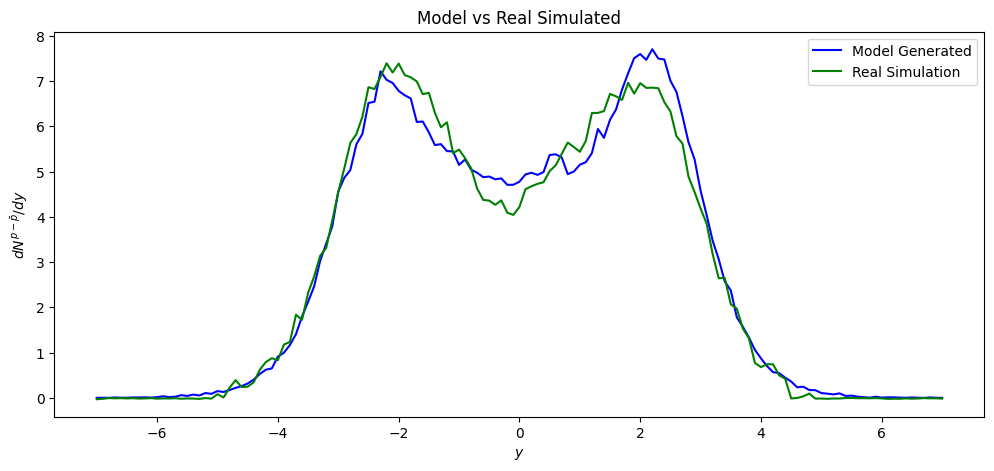

4800


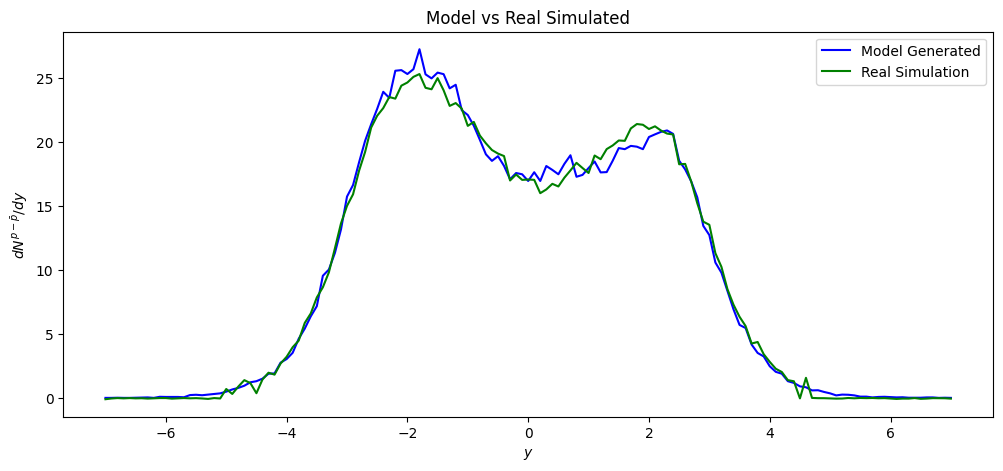

4900


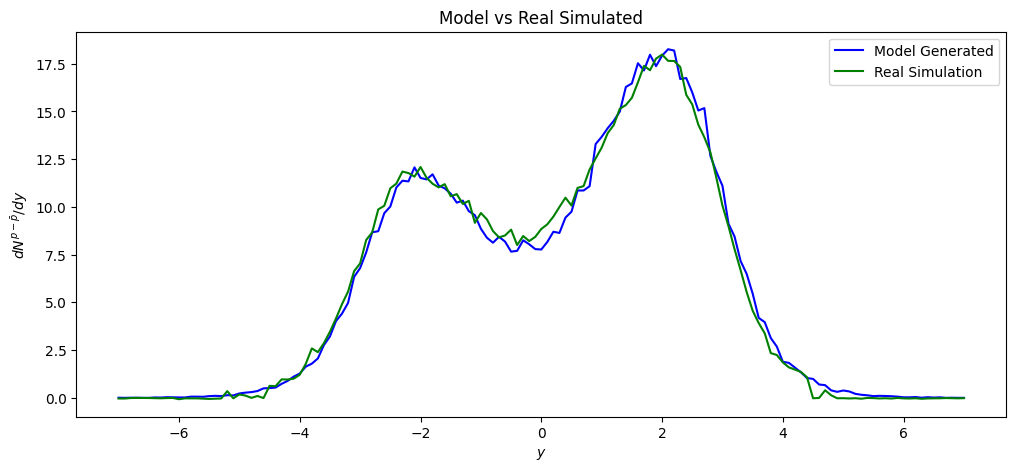

In [8]:
for epoch in range(epochs):
    for i, data in enumerate(data_loader):
        keys = data[0]
        values = data[1]

        output = model(keys)

        loss = loss_func(output, values)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        if i%100 == 0 and values.max() > 5.0:
        #if values.max() > 5.0:
            print(i)
            plot_output_compare(dataset.eta, values, output.detach().numpy(), i)
    break

In [9]:
#torch.save(model, "../models/baryon_model_19.6gev.pt")